In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df = pd.read_csv(r"Data-set\Pollution_clustered.csv")

In [46]:
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,PCA1,PCA2,cluster
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,-0.205401,-0.564748,2
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,1.001018,-1.670760,2
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,1.594711,0.825507,0
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,-2.156080,-0.412464,3
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,-1.742370,-0.053360,3


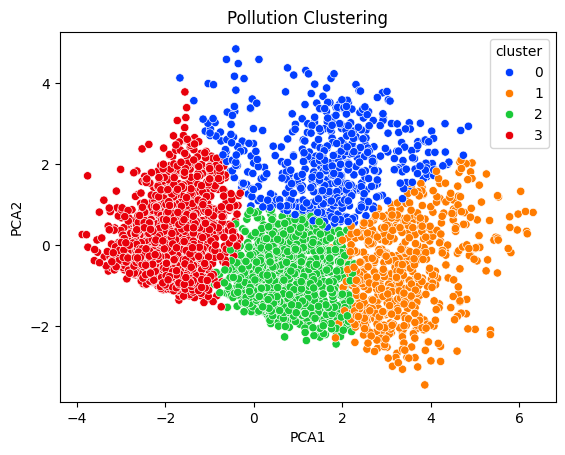

In [155]:
plt.figure(figsize = (8,6))
sns.scatterplot(x="PCA1",y="PCA2",data = df,hue="cluster", palette="bright")
plt.title("Pollution Clustering")
plt.savefig("Result_Img/PCA.png")

In [153]:
for i in ['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO','Proximity_to_Industrial_Areas', 'Population_Density']:
    print(i)
    print(df.groupby("cluster")[i].describe())
    print("\n")

Temperature
          count       mean       std   min   25%   50%   75%   max
cluster                                                           
0         540.0  29.860926  4.606800  14.4  26.7  29.9  32.7  42.9
1         598.0  36.163043  5.020917  20.4  32.6  36.3  40.0  47.3
2        1065.0  30.462817  4.277457  17.8  27.7  30.5  33.2  47.0
3        1955.0  24.975192  3.338295  13.4  22.7  25.0  27.2  35.4


Humidity
          count       mean        std   min     25%    50%    75%    max
cluster                                                                 
0         540.0  70.370185  12.948845  38.8  60.450  70.25  79.85  109.1
1         598.0  83.305017  12.667483  49.1  73.625  82.65  93.00  111.8
2        1065.0  70.895962  12.258386  42.3  60.900  71.80  80.60  105.9
3        1955.0  59.935396  11.592978  36.0  50.200  60.00  69.60   84.3


PM2.5
          count       mean        std   min     25%    50%     75%   max
cluster                                                 

In [135]:
df.groupby("cluster").mean()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,PCA1,PCA2
cluster,,,,,,,,,,,
0,29.860926,70.370185,35.752778,46.150370,26.155370,9.272593,1.519222,7.244259,501.735185,1.648236,2.046152
1,36.163043,83.305017,16.815385,32.372408,34.538462,15.254682,2.021639,5.173579,618.633779,3.403221,-0.655884
2,30.462817,70.895962,8.890798,19.285728,26.981315,10.323756,1.551362,6.741972,503.770892,0.794932,-0.761470
3,24.975192,59.935396,8.801995,13.960716,19.503223,5.051765,1.006583,11.891100,397.352941,-1.929297,0.050262


In [108]:
df.groupby("cluster")["Population_Density"].sum().reset_index()

,cluster,Population_Density
0,0,270937
1,1,369943
2,2,536516
3,3,776825


<Axes: xlabel='cluster', ylabel='Population_Density'>

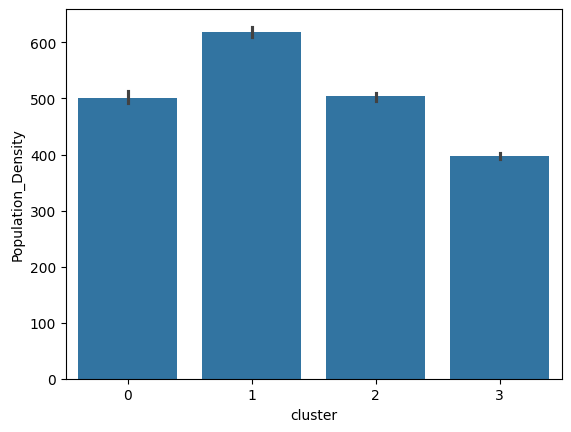

In [112]:
pop = df.groupby("cluster")["Population_Density"].sum().reset_index()
sns.barplot(x="cluster",y="Population_Density",data=df)
plt.savefig("Result_Img/Population.png")

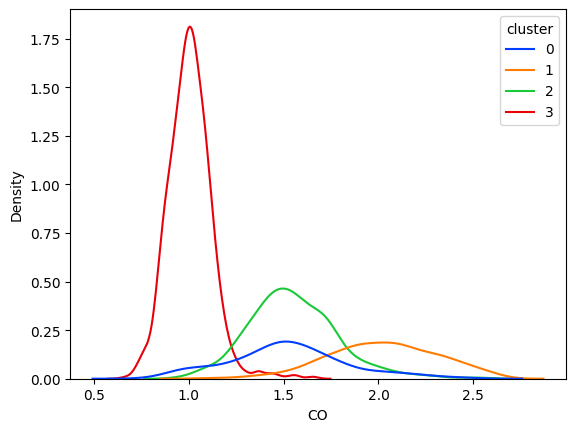

In [157]:
pop1 = df.groupby("cluster")["CO"].sum().reset_index()
sns.kdeplot(data=df, x="CO", hue="cluster",palette="bright")
plt.savefig("Result_Img/carbonmonoKDE.png")

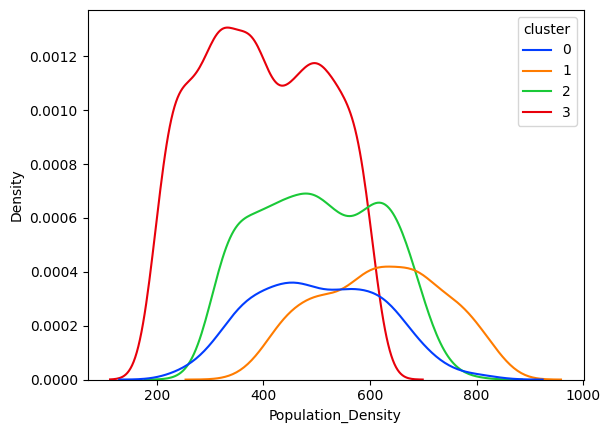

In [158]:
sns.kdeplot(data=df, x="Population_Density", hue="cluster",palette="bright")
plt.savefig("Result_Img/popnKDE.png")

In [128]:
df.columns

Index(['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO',
       'Proximity_to_Industrial_Areas', 'Population_Density', 'PCA1', 'PCA2',
       'cluster'],
      dtype='object')

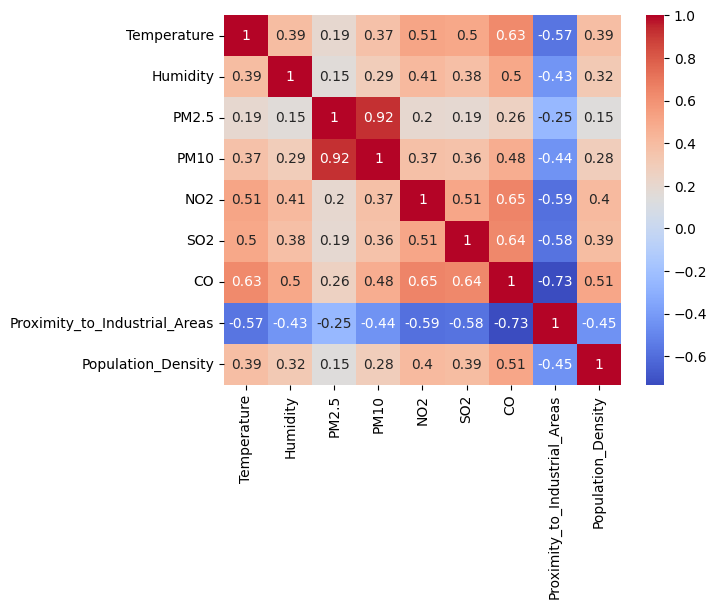

In [159]:
sns.heatmap(df[['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO',
                'Proximity_to_Industrial_Areas', 'Population_Density']].corr(),
            annot=True, cmap='coolwarm')
plt.savefig("Result_Img/corr.png")

<Axes: >

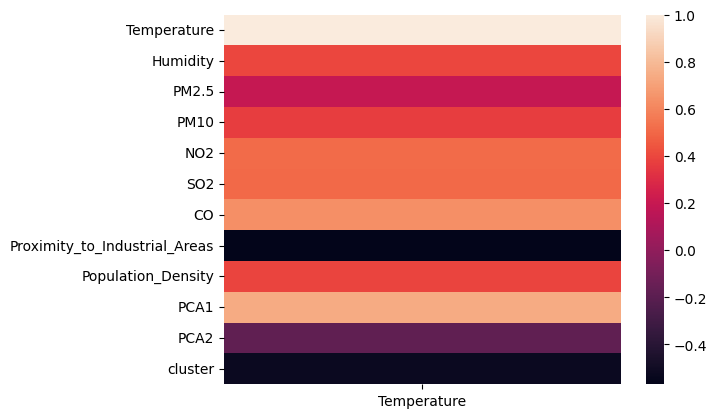

In [138]:
sns.heatmap(data=df.corr()[["Temperature"]])

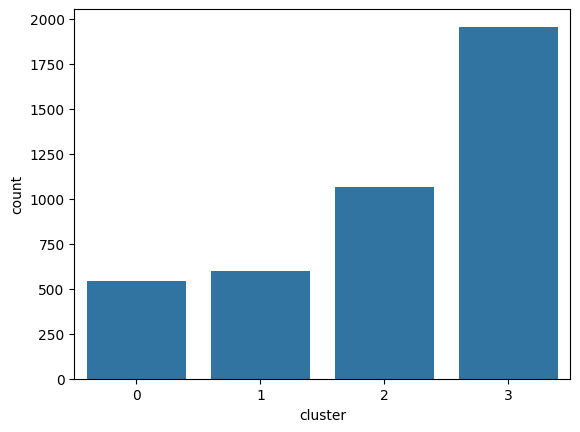

In [160]:
sns.countplot(x="cluster",data=df)
plt.savefig("Result_Img/count.png")

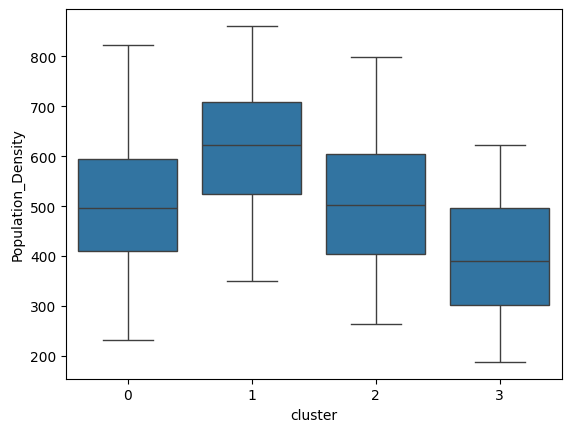

In [161]:
sns.boxplot(x="cluster", y="Population_Density", data=df)
plt.savefig("Result_Img/box.png")